# How Completely Fair Random Games Can Drain Your Capital

In [1]:
import numpy as np
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt

In [30]:
win_odd = 0.5
lose_odd = 1 - win_odd
win_payoff = 0.05
lose_payoff = 0.05

num_months = 120
num_players = 1000

In [31]:
df = pd.DataFrame(np.random.uniform(size=(num_months, num_players))) # raw uniforrm random vars
df.index = [date(2000, 1, 1) + month * timedelta(weeks=4) for month in range(num_months)]
df = df.apply(lambda x: 2.0 * (x > lose_odd) - 1.0) # binary of 1 & -1 denoting win & lose
df = df.apply(lambda x: x * win_payoff * (x == 1) + x * lose_payoff * (x == -1)) # single period payoff
df = df.apply(lambda x: x + 1) # single period percentage multiplier
df = df.cumprod()

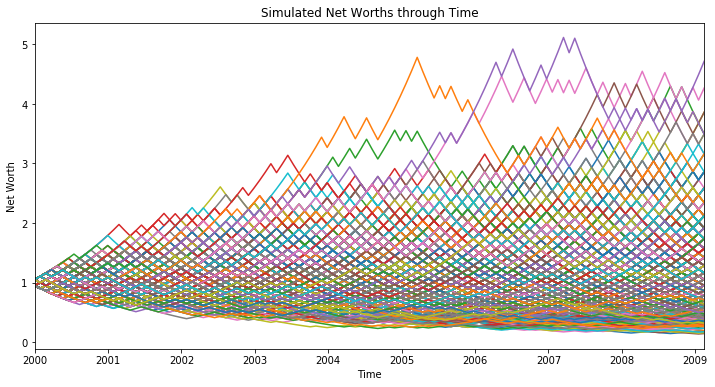

In [32]:
ax = df.plot(legend=0, figsize=(12,6), title="Simulated Net Worths through Time")
ax.set_xlabel("Time")
ax.set_ylabel("Net Worth")
plt.show()

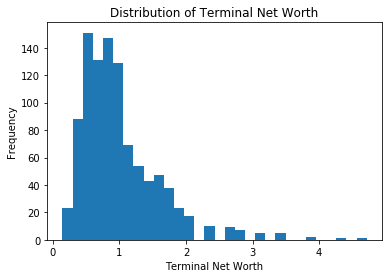

In [33]:
plt.hist(df.iloc[-1].to_list(), bins=30)
plt.title("Distribution of Terminal Net Worth")
plt.xlabel("Terminal Net Worth")
plt.ylabel("Frequency")
plt.show()

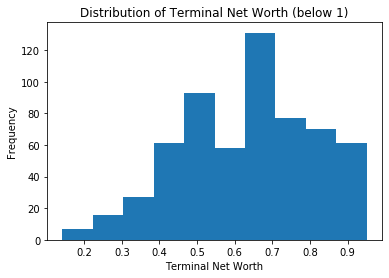

In [34]:
sr = df.iloc[-1]
sr = sr[sr < 1]
plt.hist(sr.to_list(), bins=10)
plt.title("Distribution of Terminal Net Worth (below 1)")
plt.xlabel("Terminal Net Worth")
plt.ylabel("Frequency")
plt.show()

### The probability of losing money

In [35]:
df.iloc[-1].apply(lambda x: 1.0 * (x < 1)).sum() / df.shape[1]

0.601